In [3]:
import numpy as np
def AND_gate(x):
    w1=0.5
    w2=0.5
    b=-0.7
    result = x[0]*w1 + x[1]*w2 + b
    if result <= 0:
        return 0
    else:
        return 1


In [4]:
input_data = np.array([[0,0], [0,1], [1,0], [1,1]])
result = []
for x in input_data:
    result.append(AND_gate(x))
print(result)


[0, 0, 0, 1]


In [5]:
import numpy as np
def OR_gate(x):
    w1=0.6
    w2=0.6
    b=0.5
    result = x[0]*w1 + x[1]*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [6]:
input_data = np.array([[0,0], [0,1], [1,0], [1,1]])
result = []
for x in input_data:
    result.append(OR_gate(x))
print(result)

[1, 1, 1, 1]


In [7]:
# AND 게이트와 반대로 

import numpy as np
def NAND_gate(x):
    w1=-0.5
    w2=-0.5
    b=0.7
    result = x[0]*w1 + x[1]*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [8]:
input_data = np.array([[0,0], [0,1], [1,0], [1,1]])
result = []
for x in input_data:
    result.append(NAND_gate(x))
print(result)

[1, 1, 1, 0]


In [9]:
#XOR 게이트

input_data = np.array([[0,0], [0,1], [1,0], [1,1]])

s1 = [] # NAND 출력
s2 = [] # OR 출력
new_input_data = [] # s1과 s2를 입력으로 받는 AND 게이트
final_output = [] # 최종 출력 => XOR 게이트

for i in range(len(input_data)):
    s1=NAND_gate(input_data[i]) # NAND 출력
    s2=OR_gate(input_data[i]) # OR 출력

    new_input_data.append(s1) # NAND 출력과 OR 출력을 입력값으로 받는 AND 게이트
    new_input_data.append(s2) # NAND 출력과 OR 출력을 입력값으로 받는

    result = AND_gate(new_input_data) # AND 출력
    final_output.append(result) # 최종 출력
    new_input_data = [] # AND 입력 초기화
print(final_output)

[1, 1, 1, 0]


In [10]:
# XOR 게이트를 구현한 단층 퍼셉트론

import torch
import torch.nn as nn
import torch.optim as optim

X = torch.FloatTensor([[0,0], [0,1], [1,0], [1,1]])
Y = torch.FloatTensor([[0], [1], [1], [0]]) # XOR 연산  

linear = nn.Linear(2,1, bias=True) # input_dim = 2, output_dim = 1
sigmoid = nn.Sigmoid()  # 출력을 시그모이드 함수를 이용해 0~1 사이의 값으로 변환
model = nn.Sequential(linear, sigmoid) 

criterion = torch.nn.BCELoss() # 이진 분류에 사용하는 크로스엔트로피 함수 (Binary Cross Entropy)
optimizer = torch.optim.SGD(model.parameters(), lr=1) # 경사하강법 SGD 사용 

In [11]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0: # 100번째 에포크마다 비용 출력
        print(step, cost.item())

0 0.7244454026222229
100 0.6931474804878235
200 0.6931471824645996
300 0.6931472420692444
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [12]:
prediction=model(X) # 학습 후 예측
print((prediction>0.5).float()) # 예측값이 0.5를 넘으면 1, 넘지 않으면 0 출력. float() 사용 안 할 시 tensor 출력 

tensor([[0.],
        [0.],
        [0.],
        [0.]])


딥러닝 활용 XOR 

In [13]:
#훈련 데이터
X = torch.FloatTensor([[0,0], [0,1], [1,0], [1,1]])
Y = torch.FloatTensor([[0], [1], [1], [0]]) # XOR 연산  

In [14]:
#모델

model = nn.Sequential(
    nn.Linear(2,10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10,10, bias=True), # 두번쨰 은닉층 
    nn.Sigmoid(),
    nn.Linear(10,10, bias=True), # 세번째 은닉층
    nn.Sigmoid(),
    nn.Linear(10,1, bias=True), # 출력층
    nn.Sigmoid()
)




In [15]:
#비용함수 및 옵티마이저
criterion =torch.nn.BCELoss() # 이진 분류에 사용하는 크로스엔트로피 함수 (Binary Cross Entropy)
optimizer = torch.optim.SGD(model.parameters(), lr=1) # 경사하강법 SGD 사용 


In [16]:
#모델 학습
for epoch in range(10001):
    optimizer.zero_grad()
    y_hat=model(X)
    cost=criterion(y_hat, Y)
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(epoch, cost.item())


0 0.6942747235298157
100 0.6931433081626892
200 0.6931424736976624
300 0.6931416392326355
400 0.6931408047676086
500 0.693139910697937
600 0.6931390762329102
700 0.6931381225585938
800 0.6931371688842773
900 0.6931361556053162
1000 0.693135142326355
1100 0.6931340098381042
1200 0.6931328177452087
1300 0.6931316256523132
1400 0.693130373954773
1500 0.6931289434432983
1600 0.6931275129318237
1700 0.6931259632110596
1800 0.6931242942810059
1900 0.6931225657463074
2000 0.6931207180023193
2100 0.693118691444397
2200 0.6931164264678955
2300 0.6931140422821045
2400 0.6931113600730896
2500 0.6931084394454956
2600 0.6931052207946777
2700 0.6931016445159912
2800 0.693097710609436
2900 0.6930932998657227
3000 0.6930882930755615
3100 0.6930825710296631
3200 0.6930761337280273
3300 0.6930687427520752
3400 0.6930601596832275
3500 0.6930500268936157
3600 0.6930383443832397
3700 0.6930242776870728
3800 0.6930071711540222
3900 0.6929863691329956
4000 0.6929605603218079
4100 0.6929278373718262
4200 0.69

In [17]:
#모델 사용하여 예측
prediction=model(X)
print((prediction>0.5).float())

tensor([[0.],
        [1.],
        [1.],
        [0.]])


In [18]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [19]:
#하이퍼볼릭 탄젠트 함수
x = np.arange(-5, 5, 0.1) # -5부터 5까지 0.1 간격 생성
y = np.tanh(x) 

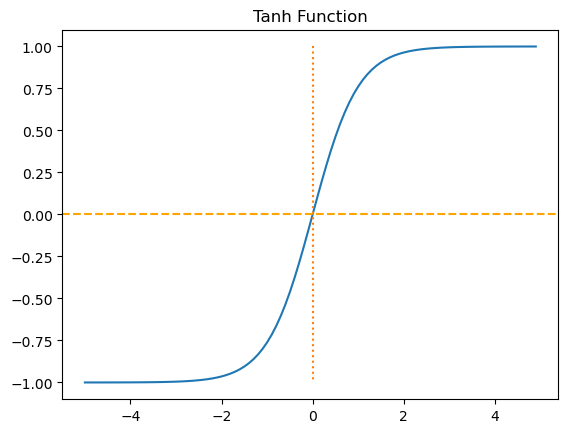

In [20]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':') # 가운데 점선 추가
plt.axhline(y=0, color='orange', linestyle='--') # 수평 점선 추가
plt.title('Tanh Function')
plt.show()


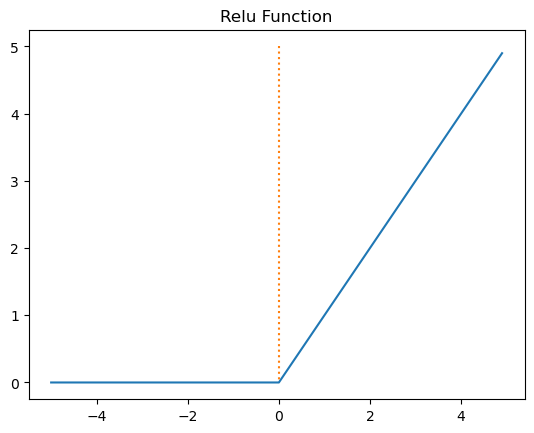

In [21]:
#ReLU 함수

def relu(x):
    return np.maximum(0,x) # x값이 0보다 작으면 0을 반환, 0보다 크면 x를 반환

x = np.arange(-5, 5, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0], [5.0, 0.0], ':') # 가운데 점선 추가
plt.title('Relu Function')
plt.show()

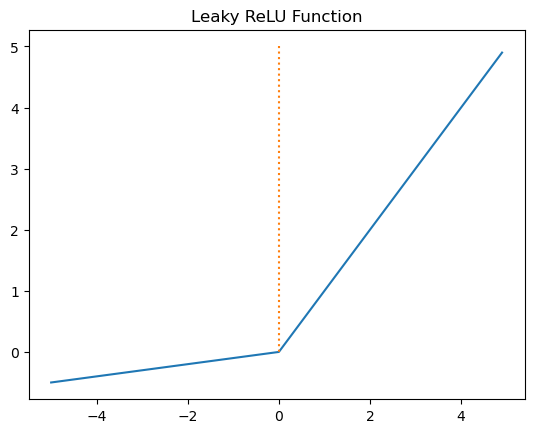

In [22]:
# Leaky ReLU 함수

a = 0.1 # a에 따라 변형 가능

def leaky_relu(x):
    return np.maximum(a*x, x) # x값이 0보다 작으면 a*x를 반환, 0보다 크면 x를 반환

x = np.arange(-5, 5, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0], [5.0, 0.0], ':') # 가운데 점선 추가
plt.title('Leaky ReLU Function')
plt.show()